<a href="https://colab.research.google.com/github/ariquintal/machinelearning/blob/main/Expo_My_Code(Naive_B%2C_SVM%2C_DT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Pizza-Price.csv")
data

,Restaurant,ExtraCheeze,ExtraMushroom,SizebyInch,ExtraSpicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


Error Cuadrático Medio (MSE): 1875.0


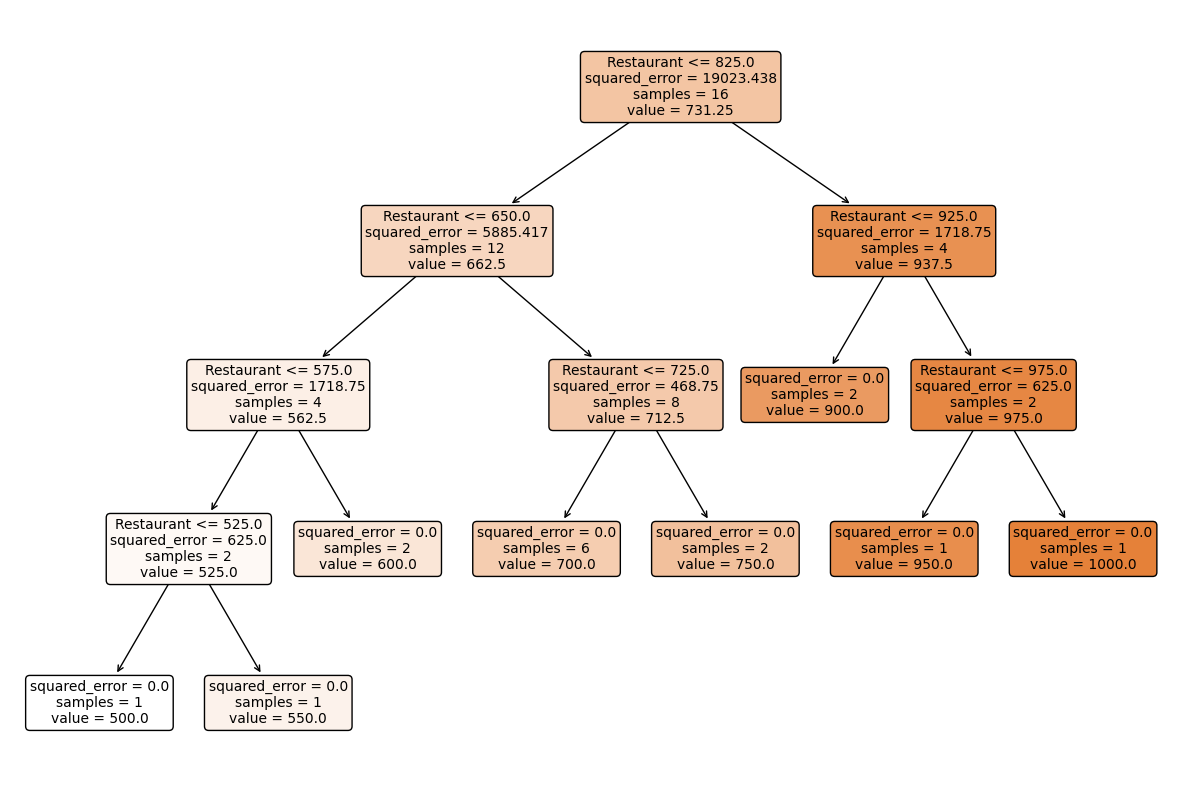

In [ ]:
# Seleccionar las características (X) y la variable objetivo (y)
X = data.drop('SizebyInch', axis=1)  # Cambia 'variable_objetivo' al nombre real de tu variable objetivo
y = data['Price']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Eliminar Columnas no deseadas
columnas_no_util = ['Restaurant', 'ExtraCheeze', 'ExtraMushroom', 'ExtraSpicy']

# Eliminar las columnas no deseadas del entrenamiento
X_train = X_train.drop(columnas_no_util, axis=1)

# Eliminar las columnas no deseadas de prueba
X_test = X_test.drop(columnas_no_util, axis=1)

# Crear un modelo de árbol de decisión para regresión
regression_tree = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
regression_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression_tree.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")

# Visualizar el árbol de decisión (opcional)
# Puedes ajustar los parámetros para cambiar la visualización
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(regression_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.show()

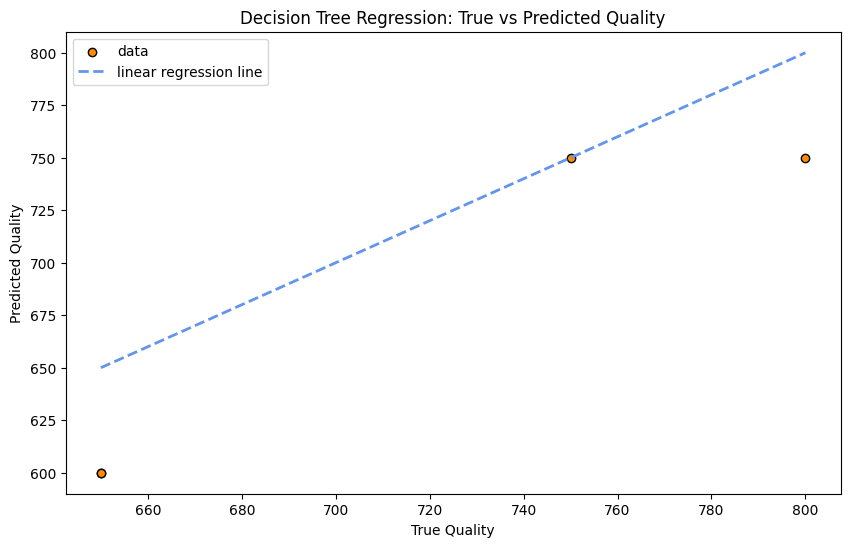

In [ ]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor="black", c="darkorange", label="data")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="cornflowerblue", linewidth=2, label="linear regression line")
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("Decision Tree Regression: True vs Predicted Quality")
plt.legend()
plt.show()

In [ ]:
#accuracy

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")


Coeficiente de Determinación (R²): 0.5555555555555556


In [ ]:
!jupyter nbconvert --to html regression_tree.ipynb

[NbConvertApp] Converting notebook regression_tree.ipynb to html
[NbConvertApp] Writing 836977 bytes to regression_tree.html
